In [33]:
from pySankey.sankey import sankey
import pySankey.sankey
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('/data/work/script/metaneighbor0706/test_metaNeighbor_tophits.csv')

# Set colors（非必须，纯纯为了好看）
colors = {
	"CCB": "#ea9a81",
	"BOCM": "#ebc08c",
	"ABC": "#b89ae0",
	"ICBC": "#aed5fb",
	"BOC": "#92a0f7",
	"kawa": "#e38593",
	"koto": "#e38593",
	"saki": "#e38593",
	"yama": "#e38593",
	"nikoto": "#e38593"
}

In [25]:
df

,bank,people,money
0,CCB,kawa,10
1,CCB,koto,30
2,BOCM,saki,50
3,BOCM,yama,5
4,ABC,kawa,12
5,ABC,nikoto,40
6,ABC,yama,80
7,ICBC,kawa,100
8,ICBC,nikoto,3
9,BOC,kawa,66


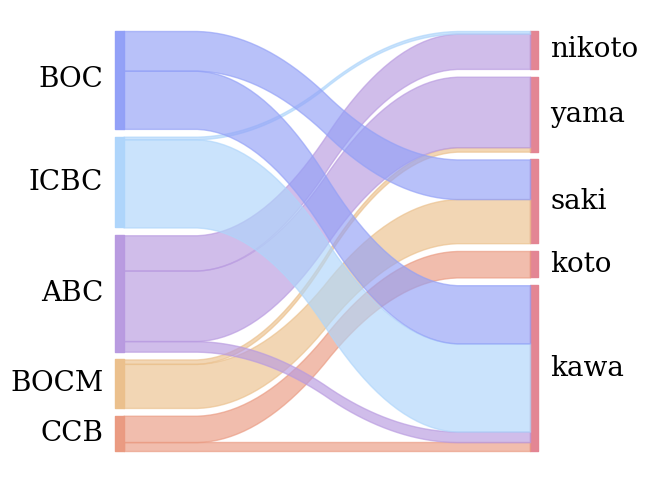

In [34]:
# plot data（核心就这一句话！）
sky = sankey(
	left=df["bank"], right=df["people"],
	leftWeight=df["money"], rightWeight=df["money"],
	aspect=20, fontsize=20, colorDict=colors
)

In [37]:
df = pd.read_csv('/data/work/script/metaneighbor0706/output0716/D1_D2_metaNeighbor_tophits.csv')
print(df)
# Set colors（非必须，纯纯为了好看）
colors = {
	"CCB": "#ea9a81",
	"BOCM": "#ebc08c",
	"ABC": "#b89ae0",
	"ICBC": "#aed5fb",
	"BOC": "#92a0f7",
	"kawa": "#e38593",
	"koto": "#e38593",
	"saki": "#e38593",
	"yama": "#e38593",
	"nikoto": "#e38593"
}

      Study_ID|Celltype_1    Study_ID|Celltype_2  Mean_AUROC  \
0             D1|Phloem_1            D2|Phloem_2        0.99   
1       D1|Dividing cells    D2|Dividing cells_1        0.97   
2             D1|Phloem_3            D2|Phloem_1        0.97   
3          D1|Epidermis_5         D2|Epidermis_2        0.96   
4          D1|Epidermis_3         D2|Epidermis_9        0.96   
5          D2|Epidermis_9         D1|Epidermis_8        0.95   
6          D1|Epidermis_8        D2|Epidermis_10        0.94   
7       D1|Sclerenchyma_2      D2|Sclerenchyma_1        0.93   
8         D1|Procambium_2         D2|Epidermis_7        0.93   
9          D2|Epidermis_2         D1|Epidermis_4        0.93   
10         D2|Epidermis_9         D1|Epidermis_7        0.93   
11        D1|Procambium_2        D2|Procambium_2        0.93   
12         D1|Epidermis_2         D2|Epidermis_4        0.92   
13        D2|Epidermis_10         D1|Epidermis_9        0.92   
14      D1|Dividing cells    D2|Dividing

In [45]:
mask = ~df['Study_ID|Celltype_1'].str.startswith('D1')
cols = ['Study_ID|Celltype_1', 'Study_ID|Celltype_2']
df.loc[mask, cols] = df.loc[mask, cols].values[:, ::-1]
print(df)

      Study_ID|Celltype_1    Study_ID|Celltype_2  Mean_AUROC  \
0             D1|Phloem_1            D2|Phloem_2        0.99   
1       D1|Dividing cells    D2|Dividing cells_1        0.97   
2             D1|Phloem_3            D2|Phloem_1        0.97   
3          D1|Epidermis_5         D2|Epidermis_2        0.96   
4          D1|Epidermis_3         D2|Epidermis_9        0.96   
5          D1|Epidermis_8         D2|Epidermis_9        0.95   
6          D1|Epidermis_8        D2|Epidermis_10        0.94   
7       D1|Sclerenchyma_2      D2|Sclerenchyma_1        0.93   
8         D1|Procambium_2         D2|Epidermis_7        0.93   
9          D1|Epidermis_4         D2|Epidermis_2        0.93   
10         D1|Epidermis_7         D2|Epidermis_9        0.93   
11        D1|Procambium_2        D2|Procambium_2        0.93   
12         D1|Epidermis_2         D2|Epidermis_4        0.92   
13         D1|Epidermis_9        D2|Epidermis_10        0.92   
14      D1|Dividing cells    D2|Dividing

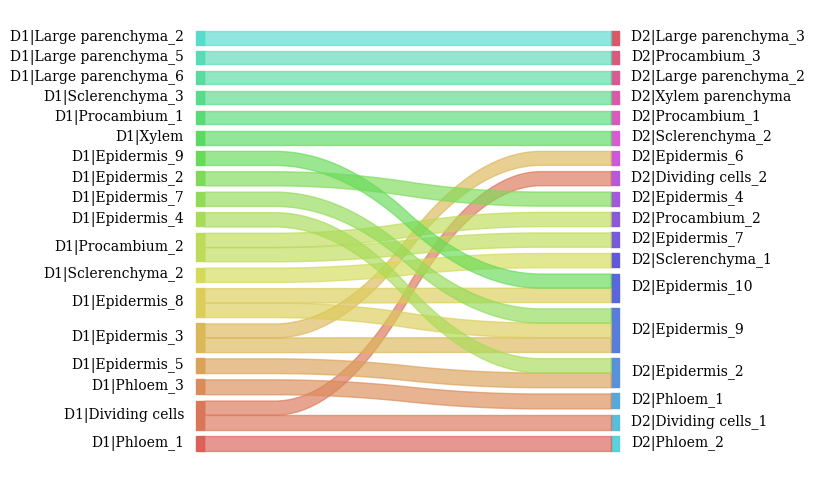

In [43]:
sky = sankey(
	left=df["Study_ID|Celltype_1"], right=df["Study_ID|Celltype_2"],
	leftWeight=df["Mean_AUROC"], rightWeight=df["Mean_AUROC"],
	aspect=10, fontsize=10, colorDict=None
)

In [46]:
import pandas as pd
import plotly.graph_objects as go

# --- 1. 读数据 -------------------------------------------------------------
# df = pd.read_csv('metaNeighbor.csv')

# 三列：source, target, match
df['source'] = df['Study_ID|Celltype_1']
df['target'] = df['Study_ID|Celltype_2']
df['match']  = df['Match_type']

# --- 2. 构造三阶节点列表 ---------------------------------------------------
# 顺序：全部 source → 全部 target → 全部 match
nodes = list(df['source'].unique()) + \
        list(df['target'].unique()) + \
        list(df['match'].unique())
node2id = {n: i for i, n in enumerate(nodes)}

# --- 3. 准备两跳边 ---------------------------------------------------------
# ① source -> target
df_s2t = df.copy()
df_s2t['source_id'] = df_s2t['source'].map(node2id)
df_s2t['target_id'] = df_s2t['target'].map(node2id)

# ② target -> match
df_t2m = df.copy()
df_t2m['source_id'] = df_t2m['target'].map(node2id)
df_t2m['target_id'] = df_t2m['match'].map(node2id)

# 合并两跳
edges = pd.concat([
    df_s2t[['source_id', 'target_id', 'Mean_AUROC']],
    df_t2m[['source_id', 'target_id', 'Mean_AUROC']]
])

# 保证列名统一
edges = edges.rename(columns={'Mean_AUROC': 'value'})

# --- 4. 绘图 ---------------------------------------------------------------
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes
    ),
    link=dict(
        source=edges['source_id'],
        target=edges['target_id'],
        value=edges['value']
    ))])

fig.update_layout(title_text="三阶 Sankey：Celltype1 → Celltype2 → Match_type",
                  font_size=12)
fig.write_html("3d_sankey.html")
print("已生成 3d_sankey.html")

已生成 3d_sankey.html


In [54]:
import pandas as pd
import sys
import plotly.graph_objects as go
from operator import itemgetter
import matplotlib.pyplot as plt
import numpy as np
path="/data/work/script/metaneighbor0706/output0716/D1_D2_metaNeighbor.csv"
MT = pd.read_table(path, sep=',', header=0)
MT

,Unnamed: 0,D1|Bundle sheath_1,D1|Bundle sheath_2,D1|Dividing cells,D1|Epidermis_1,D1|Epidermis_10,D1|Epidermis_2,D1|Epidermis_3,D1|Epidermis_4,D1|Epidermis_5,...,D2|Phloem_2,D2|Procambium_1,D2|Procambium_2,D2|Procambium_3,D2|Procambium_4,D2|Sclerenchyma_1,D2|Sclerenchyma_2,D2|Sclerenchyma_3,D2|Xylem,D2|Xylem parenchyma
0,D1|Bundle sheath_1,0.970191,0.764734,0.185613,0.217623,0.772564,0.140475,0.515603,0.678265,0.700655,...,0.742659,0.565288,0.188815,0.266440,0.250268,0.773601,0.598099,0.562894,0.767565,0.764967
1,D1|Bundle sheath_2,0.764734,0.976847,0.495742,0.503562,0.313583,0.348200,0.400494,0.431131,0.394739,...,0.433258,0.570228,0.468384,0.522368,0.610243,0.369109,0.335197,0.520035,0.440905,0.483567
2,D1|Dividing cells,0.185613,0.495742,0.988853,0.697993,0.124796,0.591392,0.369129,0.258623,0.189125,...,0.221864,0.443793,0.833370,0.661755,0.667349,0.199483,0.306694,0.405970,0.263113,0.253825
3,D1|Epidermis_1,0.217623,0.503562,0.697993,0.956342,0.335581,0.792866,0.832186,0.641706,0.695061,...,0.336116,0.403491,0.672141,0.606264,0.548678,0.350260,0.457091,0.617903,0.313753,0.306575
4,D1|Epidermis_10,0.772564,0.313583,0.124796,0.335581,0.990442,0.241347,0.687040,0.894494,0.886764,...,0.795732,0.430667,0.159518,0.164802,0.172803,0.880957,0.769461,0.644433,0.780440,0.729934
5,D1|Epidermis_2,0.140475,0.348200,0.591392,0.792866,0.241347,0.955951,0.613470,0.377963,0.594154,...,0.282027,0.479591,0.695120,0.773641,0.767585,0.224126,0.545630,0.538187,0.197915,0.279467
6,D1|Epidermis_3,0.515603,0.400494,0.369129,0.832186,0.687040,0.613470,0.986158,0.889113,0.931289,...,0.568108,0.514848,0.207356,0.308684,0.206589,0.730534,0.712813,0.826032,0.630041,0.678324
7,D1|Epidermis_4,0.678265,0.431131,0.258623,0.641706,0.894494,0.377963,0.889113,0.975070,0.959385,...,0.675322,0.456468,0.201002,0.211405,0.195931,0.782754,0.700996,0.742836,0.691883,0.670515
8,D1|Epidermis_5,0.700655,0.394739,0.189125,0.695061,0.886764,0.594154,0.931289,0.959385,0.999244,...,0.681787,0.502227,0.151089,0.214662,0.191484,0.765536,0.759608,0.810635,0.624580,0.743124
9,D1|Epidermis_6,0.717882,0.292117,0.173088,0.335739,0.958599,0.225959,0.671240,0.860345,0.796271,...,0.753882,0.350903,0.211705,0.152899,0.149354,0.897767,0.699811,0.570174,0.797323,0.654969


In [55]:
temp=MT.melt(id_vars=['Unnamed: 0'])

In [56]:
temp.head()

,Unnamed: 0,variable,value
0,D1|Bundle sheath_1,D1|Bundle sheath_1,0.970191
1,D1|Bundle sheath_2,D1|Bundle sheath_1,0.764734
2,D1|Dividing cells,D1|Bundle sheath_1,0.185613
3,D1|Epidermis_1,D1|Bundle sheath_1,0.217623
4,D1|Epidermis_10,D1|Bundle sheath_1,0.772564


In [62]:
temp['variable'].unique()

array(['D1|Bundle sheath_1', 'D1|Bundle sheath_2', 'D1|Dividing cells',
       'D1|Epidermis_1', 'D1|Epidermis_10', 'D1|Epidermis_2',
       'D1|Epidermis_3', 'D1|Epidermis_4', 'D1|Epidermis_5',
       'D1|Epidermis_6', 'D1|Epidermis_7', 'D1|Epidermis_8',
       'D1|Epidermis_9', 'D1|Large parenchyma_1', 'D1|Large parenchyma_2',
       'D1|Large parenchyma_3', 'D1|Large parenchyma_4',
       'D1|Large parenchyma_5', 'D1|Large parenchyma_6', 'D1|Phloem_1',
       'D1|Phloem_2', 'D1|Phloem_3', 'D1|Procambium_1', 'D1|Procambium_2',
       'D1|Procambium_3', 'D1|Sclerenchyma_1', 'D1|Sclerenchyma_2',
       'D1|Sclerenchyma_3', 'D1|Xylem', 'D2|Bundle sheath_1',
       'D2|Bundle sheath_2', 'D2|Dividing cells_1', 'D2|Dividing cells_2',
       'D2|Epidermis_1', 'D2|Epidermis_10', 'D2|Epidermis_11',
       'D2|Epidermis_2', 'D2|Epidermis_3', 'D2|Epidermis_4',
       'D2|Epidermis_5', 'D2|Epidermis_6', 'D2|Epidermis_7',
       'D2|Epidermis_8', 'D2|Epidermis_9', 'D2|Large parenchyma_1',
       

In [ ]:
temp['Unnamed: 0'].unique()